### The relationship between salary and other factors in the survey of stackoverflow

#### Salary and self-learning factor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
survey_path = "/Users/jimmytsai/Downloads/stack-overflow-2018-developer-survey/survey_results_public.csv"
survey = pd.read_csv(survey_path,',')

In [4]:
survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
9,16,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check the number of na values in each column.**

In [5]:
survey.isnull().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

**1. Since the ConvertedSalary column is related to all of our use cases, we first do data cleaning on this column.**    

**Corresponding Question:**     
**ConvertedSalary - Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks.**

In [6]:
survey['ConvertedSalary'].describe()

count    4.770200e+04
mean     9.578086e+04
std      2.023482e+05
min      0.000000e+00
25%      2.384400e+04
50%      5.507500e+04
75%      9.300000e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64

In [7]:
survey[survey['ConvertedSalary'] < 100][['Respondent', 'ConvertedSalary']]


,Respondent,ConvertedSalary
14,21,0.0
488,693,0.0
1818,2547,0.0
1963,2745,0.0
2281,3229,72.0
2395,3401,0.0
2924,4168,98.0
3248,4649,0.0
3262,4665,60.0
3720,5344,0.0


**We can see that there are 921 respondents use a number less than 100 as their converted annual salary, which is apparently unreasonable, so we decided to drop these records, along with those contains NA value in this column.**

In [8]:
survey = survey[survey['ConvertedSalary'] >= 100]

In [9]:
survey.shape

(46781, 129)

In [10]:
survey = survey.dropna(subset=['ConvertedSalary'])
survey = survey[survey['ConvertedSalary'] != 0]
survey.shape

(46781, 129)

#### Since the maximum option of this question is 2 million, it is possible that some respondents choose this option deliberately even if their actual salary is less than this.

In [11]:
survey[survey['ConvertedSalary']==2000000].shape[0]

227

**As a result, we decide to drop the records who has "0-2 years" professional coding experience and 2 million Converted Salary.**

In [12]:
survey = survey[(survey['ConvertedSalary']!=2000000) | (survey['YearsCodingProf']!='0-2 years')]

In [13]:
survey.shape


(46726, 129)

**Check for rows that contains too much na values.**

In [14]:
survey['na_count'] = survey.shape[1] - survey.count(axis=1)
survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,na_count
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,5
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,9
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy,4
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy,4
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy,4


In [15]:
survey['na_count'].describe()

count    46726.000000
mean        15.468668
std         14.431223
min          0.000000
25%          6.000000
50%         11.000000
75%         19.000000
max        109.000000
Name: na_count, dtype: float64

In [16]:
# survey['na_count'] = survey.apply(lambda x: x.count(), axis=1)
# survey

In [17]:
# survey = survey[survey['na_count'] <= 12]
# survey.shape

**<big>Use case 1: Relationship between Coding experience and salary.</big>**  
   
**Corresponding Columns:**     
**YearsCoding - Including any education, for how many years have you been coding?**    
**YearsCodingProf - For how many years have you coded professionally (as a part of your work)?**  

In [18]:
survey['YearsCoding'].unique()


array(['30 or more years', '6-8 years', '9-11 years', '15-17 years',
       '18-20 years', '3-5 years', '12-14 years', '0-2 years',
       '24-26 years', '21-23 years', '27-29 years', nan], dtype=object)

**Create a new column so we can compare and sort the Years of Coding value more easily.**

In [19]:
survey.loc[survey['YearsCoding'] == '0-2 years', 'Coding_level'] = 1
survey.loc[survey['YearsCoding'] == '3-5 years', 'Coding_level'] = 2
survey.loc[survey['YearsCoding'] == '6-8 years', 'Coding_level'] = 3
survey.loc[survey['YearsCoding'] == '9-11 years', 'Coding_level'] = 4
survey.loc[survey['YearsCoding'] == '12-14 years', 'Coding_level'] = 5
survey.loc[survey['YearsCoding'] == '15-17 years', 'Coding_level'] = 6
survey.loc[survey['YearsCoding'] == '18-20 years', 'Coding_level'] = 7
survey.loc[survey['YearsCoding'] == '21-23 years', 'Coding_level'] = 8
survey.loc[survey['YearsCoding'] == '24-26 years', 'Coding_level'] = 9
survey.loc[survey['YearsCoding'] == '27-29 years', 'Coding_level'] = 10
survey.loc[survey['YearsCoding'] == '30 or more years', 'Coding_level'] = 11

In [20]:
survey['Coding_level'].unique()


array([11.,  3.,  4.,  6.,  7.,  2.,  5.,  1.,  9.,  8., 10., nan])

In [21]:
survey['YearsCodingProf'].unique()


array(['18-20 years', '0-2 years', '3-5 years', '21-23 years',
       '12-14 years', '6-8 years', '9-11 years', '24-26 years',
       '15-17 years', '30 or more years', '27-29 years', nan],
      dtype=object)

**Create a new column so we can compare and sort the Years of Professional Coding value more easily.**

In [22]:
# create a new column so we can compare and sort the Years of professional coding value more easily:
survey.loc[survey['YearsCodingProf'] == '0-2 years', 'CodingProf_level'] = 1
survey.loc[survey['YearsCodingProf'] == '3-5 years', 'CodingProf_level'] = 2
survey.loc[survey['YearsCodingProf'] == '6-8 years', 'CodingProf_level'] = 3
survey.loc[survey['YearsCodingProf'] == '9-11 years', 'CodingProf_level'] = 4
survey.loc[survey['YearsCodingProf'] == '12-14 years', 'CodingProf_level'] = 5
survey.loc[survey['YearsCodingProf'] == '15-17 years', 'CodingProf_level'] = 6
survey.loc[survey['YearsCodingProf'] == '18-20 years', 'CodingProf_level'] = 7
survey.loc[survey['YearsCodingProf'] == '21-23 years', 'CodingProf_level'] = 8
survey.loc[survey['YearsCodingProf'] == '24-26 years', 'CodingProf_level'] = 9
survey.loc[survey['YearsCodingProf'] == '27-29 years', 'CodingProf_level'] = 10
survey.loc[survey['YearsCodingProf'] == '30 or more years', 'CodingProf_level'] = 11

In [23]:
survey['CodingProf_level'].unique()

array([ 7.,  1.,  2.,  8.,  5.,  3.,  4.,  9.,  6., 11., 10., nan])

**We can see from above questions that it is unreasonable for a repondent's YearsCoding value less than YearsCodingProf value, so we check for these mistaken records.**

In [24]:
survey[survey['Coding_level'] < survey['CodingProf_level']].shape[0]

295

**Give a look at these records and drop them.**

In [25]:
survey[survey['Coding_level'] < survey['CodingProf_level']][['YearsCoding', 'YearsCodingProf', 'Coding_level', 'CodingProf_level']].head(10)

,YearsCoding,YearsCodingProf,Coding_level,CodingProf_level
397,3-5 years,6-8 years,2.0,3.0
441,21-23 years,30 or more years,8.0,11.0
607,6-8 years,9-11 years,3.0,4.0
1106,0-2 years,3-5 years,1.0,2.0
1327,6-8 years,9-11 years,3.0,4.0
1492,6-8 years,9-11 years,3.0,4.0
1669,3-5 years,6-8 years,2.0,3.0
1830,0-2 years,3-5 years,1.0,2.0
1939,12-14 years,15-17 years,5.0,6.0
2769,6-8 years,9-11 years,3.0,4.0


In [26]:
survey[survey['CodingProf_level'] - survey['Coding_level'] > 1][['YearsCoding', 'YearsCodingProf', 'Coding_level', 'CodingProf_level']]

,YearsCoding,YearsCodingProf,Coding_level,CodingProf_level
441,21-23 years,30 or more years,8.0,11.0
4202,6-8 years,15-17 years,3.0,6.0
6583,3-5 years,9-11 years,2.0,4.0
9360,6-8 years,15-17 years,3.0,6.0
11643,24-26 years,30 or more years,9.0,11.0
12269,3-5 years,30 or more years,2.0,11.0
16993,3-5 years,15-17 years,2.0,6.0
17939,9-11 years,15-17 years,4.0,6.0
18586,18-20 years,24-26 years,7.0,9.0
18811,0-2 years,9-11 years,1.0,4.0


In [27]:
survey = survey[survey['Coding_level'] >= survey['CodingProf_level']]
survey.shape

(45854, 132)

**<big>Use case 2: Relationship between work and salary.</big>**  
   
**Corresponding Columns:**     
**CompanySize - Approximately how many people are employed by the company or organization you work for?**  
**TimeFullyProductive - Suppose a new developer with four years of experience, including direct experience working with your company's main technical stack, joined your team tomorrow.  All other things being equal, how long would you expect it to take before they were fully productive and contributing at a typical level to your main code base?**    

In [28]:
survey['CompanySize'].unique()

array(['10,000 or more employees', '10 to 19 employees',
       '100 to 499 employees', '1,000 to 4,999 employees',
       '20 to 99 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', 'Fewer than 10 employees', nan],
      dtype=object)

In [29]:
survey['TimeFullyProductive'].unique()


array(['One to three months', 'Three to six months', 'Less than a month',
       'Six to nine months', nan, 'Nine months to a year',
       'More than a year'], dtype=object)

**Since data in the two related column are already clean enough for analyze, we can create a plot based on the data deriectly.**

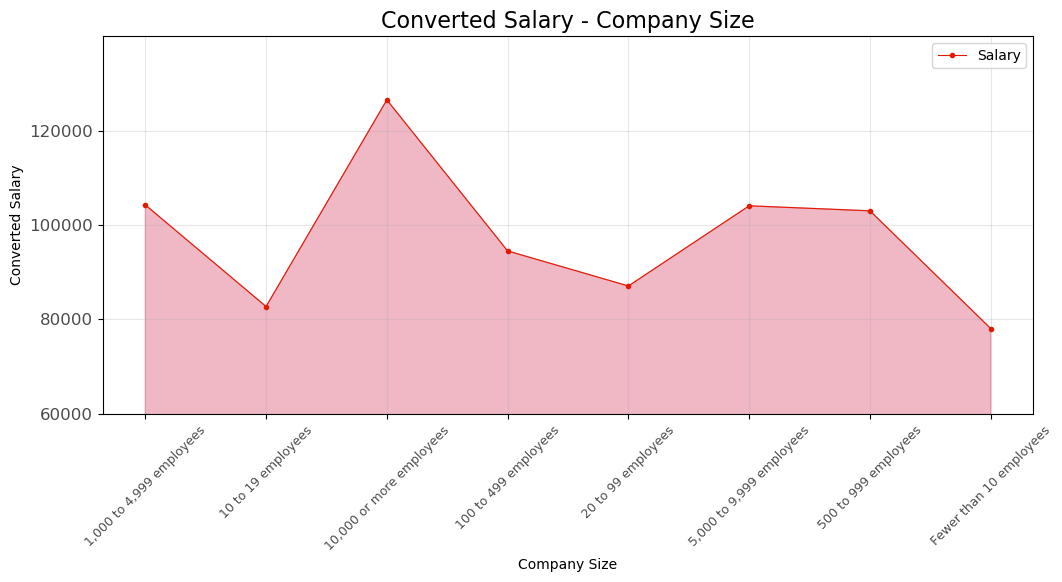

In [30]:
size_pts = survey.groupby('CompanySize')['ConvertedSalary'].mean()

plt.figure(figsize=(12,5), dpi= 100)
plt.plot(size_pts, linewidth = 0.8, marker = '.', label = "Salary", color='#E11B00')

plt.xlabel("Company Size")
plt.ylabel("Converted Salary")
plt.ylim(60000, 140000)
x_order = ['Fewer than 10 employees','10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']
plt.xticks(np.arange(0, 8, 1), fontsize=9, horizontalalignment='center', rotation = 45, alpha=0.7)
# df.set_index('Company Size').loc(xorder)
plt.yticks(np.arange(60000, 140000, 20000), fontsize=12, alpha=.7)
plt.title("Converted Salary - Company Size", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.fill_between(size_pts.index, size_pts, 0, color = "#CE1141", alpha=0.3)
plt.legend()

In [31]:
survey.FormalEducation.unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Associate degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [32]:
survey.loc[survey['FormalEducation'].str.contains("Bachelor\’s degree", na=False),'edu_level'] = "Bachelor"
survey.loc[survey['FormalEducation'].str.contains("Associate degree", na=False),'edu_level'] = "Associate"
survey.loc[survey['FormalEducation'].str.contains("Master\’s degree", na=False),'edu_level'] = "Master"
survey.loc[survey['FormalEducation'].str.contains("Some college/university study without earning a degree", na=False),'edu_level'] = "Nondegree"
survey.loc[survey['FormalEducation'].str.contains("Other doctoral degree", na=False),'edu_level'] = "Doctoral"
survey.loc[survey['FormalEducation'].str.contains("Secondary school", na=False),'edu_level'] = "Secondary"
survey.loc[survey['FormalEducation'].str.contains("Primary", na=False),'edu_level'] = "Primary"
survey.loc[survey['FormalEducation'].str.contains("Professional degree ", na=False),'edu_level'] = "Professinal"


In [33]:
survey.edu_level.unique()

array(['Bachelor', 'Nondegree', 'Master', 'Associate', 'Secondary',
       'Professinal', 'Doctoral', nan, 'Primary'], dtype=object)

In [34]:
survey.UndergradMajor.unique()

array(['A natural science (ex. biology, chemistry, physics)',
       'Computer science, computer engineering, or software engineering',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'A business discipline (ex. accounting, finance, marketing)',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       nan,
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'Information systems, information technology, or system administration',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Mathematics or statistics',
       'A health science (ex. nursing, pharmacy, radiology)',
       'I never declared a major'], dtype=object)

In [35]:
survey.loc[survey['UndergradMajor'].str.contains("Computer science, computer engineering, or software engineering", na=False),'ug_major'] = "CS"
survey.loc[survey['UndergradMajor'].str.contains("Fine arts or performing arts \(ex\. graphic design, music, studio art\)", na=False),'ug_major'] = "Fine_art"
survey.loc[survey['UndergradMajor'].str.contains("A business discipline \(ex\. accounting, finance, marketing\)", na=False),'ug_major'] = "business"
survey.loc[survey['UndergradMajor'].str.contains("Another engineering discipline \(ex. civil, electrical, mechanical\)", na=False),'ug_major'] = "other_engineer"
survey.loc[survey['UndergradMajor'].str.contains("Information systems, information technology, or system administration", na=False),'ug_major'] = "MIS"
survey.loc[survey['UndergradMajor'].str.contains("A health science \(ex. nursing, pharmacy, radiology\)", na=False),'ug_major'] = "health_science"
survey.loc[survey['UndergradMajor'].str.contains("A natural science \(ex. biology, chemistry, physics\)", na=False),'ug_major'] = "natural_science"
survey.loc[survey['UndergradMajor'].str.contains("A social science \(ex. anthropology, psychology, political science\)", na=False),'ug_major'] = "social_science"
survey.loc[survey['UndergradMajor'].str.contains("I never declared a major", na=False),'ug_major'] = "No"
survey.loc[survey['UndergradMajor'].str.contains("Mathematics or statistics", na=False),'ug_major'] = "Math"
survey.loc[survey['UndergradMajor'].str.contains("Web development or web design", na=False),'ug_major'] = "Web"


In [36]:
survey.ug_major.unique()

array(['natural_science', 'CS', 'Fine_art', 'business', 'other_engineer',
       nan, 'social_science', 'Web', 'MIS', 'Math', 'health_science',
       'No'], dtype=object)

In [37]:
survey['official_document_learning'] = survey['SelfTaughtTypes'].str.contains('The official documentation and/or standards for the technology', regex=False)

In [38]:
survey

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,na_count,Coding_level,CodingProf_level,edu_level,ug_major,official_document_learning
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Yes,NaN,The survey was an appropriate length,Somewhat easy,5,11.0,7.0,Bachelor,natural_science,True
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Yes,NaN,The survey was an appropriate length,Somewhat easy,9,3.0,1.0,Nondegree,CS,True
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,No,NaN,The survey was an appropriate length,Somewhat easy,4,3.0,2.0,Bachelor,CS,True
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,No,No,The survey was an appropriate length,Somewhat easy,4,4.0,1.0,Nondegree,CS,True
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,Yes,No,The survey was an appropriate length,Very easy,4,11.0,8.0,Nondegree,Fine_art,True
17,27,Yes,No,Sweden,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",10 to 19 employees,Back-end developer,...,Yes,NaN,The survey was too long,Somewhat difficult,13,3.0,1.0,Master,business,False
20,33,Yes,Yes,Australia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","1,000 to 4,999 employees",Database administrator;Full-stack developer;Mo...,...,Yes,NaN,The survey was too long,Neither easy nor difficult,4,6.0,5.0,Bachelor,other_engineer,True
22,37,No,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Database administrator;Desi...,...,No,NaN,The survey was too long,Neither easy nor difficult,18,4.0,3.0,Bachelor,CS,False
23,38,Yes,No,United States,No,Employed full-time,Some college/university study without earning ...,NaN,10 to 19 employees,Back-end developer;Database administrator;DevO...,...,Yes,No,The survey was too long,Very easy,8,7.0,7.0,Nondegree,NaN,True
24,39,Yes,No,India,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Mobile developer,...,No,NaN,The survey was too long,Very easy,50,2.0,2.0,Master,CS,NaN


In [39]:
survey.loc[survey['StackOverflowVisit'].str.contains("Multiple times per day", na=False),'visit_level'] = 5
survey.loc[survey['StackOverflowVisit'].str.contains("Daily or almost daily", na=False),'visit_level'] = 4
survey.loc[survey['StackOverflowVisit'].str.contains("A few times per week", na=False),'visit_level'] = 3
survey.loc[survey['StackOverflowVisit'].str.contains("A few times per month or weekly", na=False),'visit_level'] = 2
survey.loc[survey['StackOverflowVisit'].str.contains("Less than once per month or monthly", na=False),'visit_level'] = 1
survey.loc[survey['StackOverflowVisit'].str.contains("I have never visited Stack Overflow", na=False),'visit_level'] = 0


In [40]:
survey['visit_level']

1        2.0
4        4.0
5        2.0
6        5.0
8        2.0
17       5.0
20       4.0
22       2.0
23       4.0
24       4.0
25       4.0
26       3.0
27       4.0
30       4.0
32       3.0
33       2.0
35       3.0
41       4.0
42       0.0
43       3.0
45       5.0
46       5.0
47       2.0
49       2.0
51       4.0
53       3.0
56       NaN
57       5.0
62       1.0
63       5.0
        ... 
87070    4.0
87073    3.0
87077    4.0
87082    4.0
87084    5.0
87086    3.0
87088    5.0
87105    5.0
87114    5.0
87126    4.0
87131    5.0
87140    5.0
87145    2.0
87149    5.0
87151    5.0
87159    5.0
87160    2.0
87165    3.0
87174    5.0
87177    5.0
87181    3.0
87192    4.0
87199    4.0
87203    5.0
87212    4.0
87235    2.0
87239    5.0
87246    5.0
87259    3.0
87282    4.0
Name: visit_level, Length: 45854, dtype: float64

In [41]:
survey[survey['visit_level'] == 0]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,MilitaryUS,SurveyTooLong,SurveyEasy,na_count,Coding_level,CodingProf_level,edu_level,ug_major,official_document_learning,visit_level
42,63,No,No,Russian Federation,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Full-stack developer,...,NaN,NaN,NaN,55,9.0,9.0,Nondegree,CS,NaN,0.0
859,1216,Yes,Yes,Russian Federation,No,Employed full-time,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,NaN,The survey was too short,Very easy,21,7.0,5.0,Professinal,CS,True,0.0
935,1315,Yes,Yes,Egypt,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Database administrator;Desk...,...,NaN,The survey was too long,Neither easy nor difficult,32,2.0,1.0,Bachelor,CS,True,0.0
5692,8162,No,No,Netherlands,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",10 to 19 employees,Designer;Front-end developer,...,NaN,The survey was an appropriate length,Somewhat easy,15,1.0,1.0,Bachelor,business,True,0.0
9181,13109,Yes,No,South Africa,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Data or business analyst;De...,...,NaN,The survey was too long,Very easy,13,11.0,11.0,Bachelor,CS,True,0.0
10897,15553,Yes,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,QA or test developer,...,NaN,The survey was an appropriate length,Somewhat easy,17,1.0,1.0,Bachelor,CS,NaN,0.0
10956,15644,Yes,Yes,India,"Yes, full-time",Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","5,000 to 9,999 employees",Full-stack developer,...,NaN,The survey was an appropriate length,Somewhat easy,12,3.0,3.0,Master,CS,NaN,0.0
13970,19898,Yes,No,Russian Federation,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",20 to 99 employees,Back-end developer;Front-end developer,...,NaN,The survey was too long,Somewhat difficult,56,2.0,2.0,Bachelor,MIS,NaN,0.0
14116,20096,No,No,Honduras,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",Fewer than 10 employees,"C-suite executive (CEO, CTO, etc.);Data or bus...",...,NaN,The survey was an appropriate length,Neither easy nor difficult,52,4.0,4.0,Bachelor,business,True,0.0
15309,21769,Yes,Yes,Ireland,No,Employed full-time,Primary/elementary school,NaN,"5,000 to 9,999 employees",Back-end developer;DevOps specialist;Embedded ...,...,NaN,The survey was too long,Somewhat easy,12,6.0,3.0,Primary,NaN,True,0.0


In [42]:
survey.loc[survey['StackOverflowParticipate'].str.contains("Multiple times per day" , na=False),'participate_level'] = 5
survey.loc[survey['StackOverflowParticipate'].str.contains("Daily or almost daily", na=False),'participate_level'] = 4
survey.loc[survey['StackOverflowParticipate'].str.contains("A few times per week", na=False),'participate_level'] = 3
survey.loc[survey['StackOverflowParticipate'].str.contains("A few times per month or weekly", na=False),'participate_level'] = 2
survey.loc[survey['StackOverflowParticipate'].str.contains("Less than once per month or monthly", na=False),'participate_level'] = 1
survey.loc[survey['StackOverflowParticipate'].str.contains("I have never participated in Q&A on Stack Overflow", na=False),'participate_level'] = 0


In [43]:
survey['participate_level']

1        2.0
4        1.0
5        1.0
6        0.0
8        1.0
17       1.0
20       1.0
22       1.0
23       1.0
24       1.0
25       3.0
26       1.0
27       1.0
30       2.0
32       1.0
33       NaN
35       NaN
41       1.0
42       NaN
43       1.0
45       3.0
46       2.0
47       NaN
49       NaN
51       1.0
53       1.0
56       NaN
57       NaN
62       1.0
63       2.0
        ... 
87070    3.0
87073    2.0
87077    NaN
87082    0.0
87084    1.0
87086    2.0
87088    5.0
87105    NaN
87114    3.0
87126    0.0
87131    3.0
87140    0.0
87145    NaN
87149    1.0
87151    1.0
87159    2.0
87160    0.0
87165    2.0
87174    0.0
87177    4.0
87181    1.0
87192    0.0
87199    1.0
87203    3.0
87212    0.0
87235    0.0
87239    NaN
87246    0.0
87259    0.0
87282    3.0
Name: participate_level, Length: 45854, dtype: float64

In [44]:
survey[['visit_level','participate_level']][survey['visit_level'] < survey['participate_level']]

,visit_level,participate_level
364,3.0,4.0
916,4.0,5.0
1115,2.0,4.0
2357,2.0,5.0
2735,2.0,5.0
3074,3.0,4.0
4344,4.0,5.0
5107,4.0,5.0
7858,4.0,5.0
8616,4.0,5.0


In [45]:
survey.loc[survey['EducationTypes'].str.contains("Taught yourself a new language, framework, or tool without taking a formal course" , na=False),'teach_self'] = True
survey.loc[survey['EducationTypes'].str.contains("Participated in a hackathon", na=False),'hackathon'] = True
survey.loc[survey['EducationTypes'].str.contains("Contributed to open source software", na=False),'open_source'] = True
survey.loc[survey['EducationTypes'].str.contains("Completed an industry certification program (e.g. MCPD)", na=False),'certification'] = True
survey.loc[survey['EducationTypes'].str.contains("Taken an online course in programming or software development (e.g. a MOOC)", na=False),'online_course'] = True
survey.loc[survey['EducationTypes'].str.contains("Participated in a full-time developer training program or bootcamp", na=False),'bootcamp'] = True
survey.loc[survey['EducationTypes'].str.contains("Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)", na=False),'competition'] = True
survey

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,official_document_learning,visit_level,participate_level,teach_self,hackathon,open_source,certification,online_course,bootcamp,competition
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,True,2.0,2.0,True,NaN,True,NaN,NaN,NaN,NaN
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,True,4.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,True,2.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,True,5.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,True,2.0,1.0,True,True,True,NaN,NaN,NaN,NaN
17,27,Yes,No,Sweden,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",10 to 19 employees,Back-end developer,...,False,5.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN
20,33,Yes,Yes,Australia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","1,000 to 4,999 employees",Database administrator;Full-stack developer;Mo...,...,True,4.0,1.0,True,NaN,True,NaN,NaN,NaN,NaN
22,37,No,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Database administrator;Desi...,...,False,2.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN
23,38,Yes,No,United States,No,Employed full-time,Some college/university study without earning ...,NaN,10 to 19 employees,Back-end developer;Database administrator;DevO...,...,True,4.0,1.0,True,True,True,NaN,NaN,True,NaN
24,39,Yes,No,India,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Mobile developer,...,NaN,4.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
survey[['teach_self','hackathon','open_source','certification','online_course','bootcamp','competition']] = survey[['teach_self','hackathon','open_source','certification','online_course','bootcamp','competition']].fillna(False)
survey

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,official_document_learning,visit_level,participate_level,teach_self,hackathon,open_source,certification,online_course,bootcamp,competition
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,True,2.0,2.0,True,False,True,False,False,False,False
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,True,4.0,1.0,True,False,False,False,False,False,False
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,True,2.0,1.0,True,False,False,False,False,False,False
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,True,5.0,0.0,True,False,False,False,False,False,False
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,True,2.0,1.0,True,True,True,False,False,False,False
17,27,Yes,No,Sweden,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",10 to 19 employees,Back-end developer,...,False,5.0,1.0,True,False,False,False,False,False,False
20,33,Yes,Yes,Australia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","1,000 to 4,999 employees",Database administrator;Full-stack developer;Mo...,...,True,4.0,1.0,True,False,True,False,False,False,False
22,37,No,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Database administrator;Desi...,...,False,2.0,1.0,True,False,False,False,False,False,False
23,38,Yes,No,United States,No,Employed full-time,Some college/university study without earning ...,NaN,10 to 19 employees,Back-end developer;Database administrator;DevO...,...,True,4.0,1.0,True,True,True,False,False,True,False
24,39,Yes,No,India,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Mobile developer,...,NaN,4.0,1.0,True,False,False,False,False,False,False


In [47]:
# new_survey = survey[['ConvertedSalary','EducationTypes','Hobby','OpenSource','official_document_learning','visit_level','participate_level','teach_self','hackathon','open_source','certification','online_course','bootcamp','competition']]
# new_survey

In [48]:
# new_survey = new_survey[new_survey['visit_level'] >= new_survey['participate_level']]
# new_survey

### Salary and development skills

In [49]:
survey.loc[survey['LanguageWorkedWith'].str.contains("JavaScript" , na=False),'JavaScript'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("Python", na=False),'Python'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("SQL", na=False),'SQL'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("C\+\+", na=False, regex=True),'C++'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("[^a-zA-Z]C[^a-zA-Z]", na=False, regex=True),'C'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("[^a-zA-Z]C#[^a-zA-Z]", na=False, regex=True),'C#'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("[^a-zA-Z]R[^a-zA-Z]", na=False, regex=True),'R'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("Go", na=False),'Go'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("Ruby", na=False),'Ruby'] = True
survey.loc[survey['LanguageWorkedWith'].str.contains("[^a-zA-Z]Java[^a-zA-Z]", na=False, regex=True),'Java'] = True

In [50]:
survey[['JavaScript','Python','SQL','C++','C','C#', 'R','Go','Ruby','Java']] = survey[['JavaScript','Python','SQL','C++','C','C#', 'R','Go','Ruby','Java']].fillna(False)
survey[['JavaScript','Python','SQL','C++','C','C#', 'R','Go','Ruby','Java']]

,JavaScript,Python,SQL,C++,C,C#,R,Go,Ruby,Java
1,True,True,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,True,False,False,True
5,True,True,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False
8,True,True,True,False,False,False,False,True,True,False
17,False,False,True,False,False,False,False,False,False,False
20,False,True,True,True,True,False,False,True,False,False
22,True,False,True,False,False,False,False,False,False,False
23,True,False,True,False,False,False,False,False,False,False
24,True,False,True,True,True,False,False,False,False,True


In [51]:
survey.loc[survey['DatabaseWorkedWith'].str.contains("SQL Server" , na=False),'SQL_Server'] = True
survey.loc[survey['DatabaseWorkedWith'].str.contains("PostgreSQL", na=False),'PostgreSQL'] = True
survey.loc[survey['DatabaseWorkedWith'].str.contains("Oracle", na=False),'Oracle'] = True
survey.loc[survey['DatabaseWorkedWith'].str.contains("MongoDB", na=False),'MongoDB'] = True
survey.loc[survey['DatabaseWorkedWith'].str.contains("MySQL", na=False),'MySQL'] = True
survey.loc[survey['DatabaseWorkedWith'].str.contains("Microsoft Azure (Tables, CosmosDB, SQL, etc)", na=False),'Azure'] = True
survey.loc[survey['DatabaseWorkedWith'].str.contains("Google BigQuery", na=False),'BigQuery'] = True

In [52]:
survey[['SQL_Server','PostgreSQL','Oracle','MongoDB','MySQL','Azure', 'BigQuery']] = survey[['SQL_Server','PostgreSQL','Oracle','MongoDB','MySQL','Azure', 'BigQuery']].fillna(False)
survey[['SQL_Server','PostgreSQL','Oracle','MongoDB','MySQL','Azure', 'BigQuery']]

,SQL_Server,PostgreSQL,Oracle,MongoDB,MySQL,Azure,BigQuery
1,False,True,False,False,False,False,False
4,True,True,True,False,False,False,False
5,False,False,False,True,False,False,False
6,False,False,False,True,False,False,False
8,False,True,False,False,False,False,False
17,True,False,False,False,False,False,False
20,False,True,False,False,False,False,False
22,False,False,False,False,True,False,False
23,False,False,False,True,True,False,False
24,True,False,False,False,True,False,False


In [53]:
survey.loc[survey['PlatformWorkedWith'].str.contains("AWS" , na=False),'AWS'] = True
survey.loc[survey['PlatformWorkedWith'].str.contains("Azure", na=False),'Azure'] = True
survey.loc[survey['PlatformWorkedWith'].str.contains("Linux", na=False),'Linux'] = True
survey.loc[survey['PlatformWorkedWith'].str.contains("Firebase", na=False),'Firebase'] = True
survey.loc[survey['PlatformWorkedWith'].str.contains("Heroku", na=False),'Heroku'] = True
survey.loc[survey['PlatformWorkedWith'].str.contains("Android", na=False),'Android'] = True
survey.loc[survey['PlatformWorkedWith'].str.contains("iOS", na=False),'iOS'] = True

In [54]:
survey[['AWS','Azure','Linux','Firebase','Heroku','Android', 'iOS']] = survey[['AWS','Azure','Linux','Firebase','Heroku','Android', 'iOS']].fillna(False)
survey[['AWS','Azure','Linux','Firebase','Heroku','Android', 'iOS']]

,AWS,Azure,Linux,Firebase,Heroku,Android,iOS
1,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False
6,False,False,True,False,False,False,False
8,True,False,True,False,False,False,True
17,False,False,True,False,False,False,False
20,True,False,True,True,False,True,True
22,False,False,True,False,False,False,False
23,False,False,False,False,False,False,False
24,False,False,False,True,False,True,True


In [55]:
survey.loc[survey['FrameworkWorkedWith'].str.contains("Angular" , na=False),'Angular'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("Hadoop", na=False),'Hadoop'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("Django", na=False),'Django'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("Node.js", na=False),'Node'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("React", na=False),'React'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("\.NET Core", na=False, regex=True),'.NET Core'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("TensorFlow", na=False),'TensorFlow'] = True
survey.loc[survey['FrameworkWorkedWith'].str.contains("Spring", na=False),'Spring'] = True

In [56]:
survey[['Angular','Hadoop','Django','Node','React','.NET Core', 'TensorFlow','Spring']] = survey[['Angular','Hadoop','Django','Node','React','.NET Core', 'TensorFlow','Spring']].fillna(False)
survey[['Angular','Hadoop','Django','Node','React','.NET Core', 'TensorFlow','Spring']]

,Angular,Hadoop,Django,Node,React,.NET Core,TensorFlow,Spring
1,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,True,False,False,True,False,False,False,False
6,False,False,False,True,True,False,False,False
8,False,True,False,True,True,False,False,False
17,False,False,False,False,False,True,False,False
20,True,False,False,True,False,False,False,False
22,False,False,False,False,False,True,False,False
23,False,False,False,False,False,False,False,False
24,True,False,False,False,False,False,False,False


In [57]:
survey.loc[survey['DevType'].str.contains("Full-stack developer" , na=False),'Fullstack_developer'] = True
survey.loc[survey['DevType'].str.contains("Database administrator", na=False),'Database_administrator'] = True
survey.loc[survey['DevType'].str.contains("DevOps specialist", na=False),'DevOps'] = True
survey.loc[survey['DevType'].str.contains("System administrator", na=False),'System_administrator'] = True
survey.loc[survey['DevType'].str.contains("Engineering manager", na=False),'Engineering_manager'] = True
survey.loc[survey['DevType'].str.contains("Data or business analyst", na=False),'Data_business_analyst'] = True
survey.loc[survey['DevType'].str.contains("Desktop or enterprise applications developer", na=False),'applications_developer'] = True
survey.loc[survey['DevType'].str.contains("Game or graphics developer", na=False),'Game_developer'] = True
survey.loc[survey['DevType'].str.contains("QA or test developer", na=False),'QA_developer'] = True
survey.loc[survey['DevType'].str.contains("Front-end developer", na=False),'Frontend_developer'] = True
survey.loc[survey['DevType'].str.contains("Back-end developer", na=False),'Backend_developer'] = True
survey.loc[survey['DevType'].str.contains("Designer", na=False),'Designer'] = True
survey.loc[survey['DevType'].str.contains("Mobile developer", na=False),'Mobile_developer'] = True
survey.loc[survey['DevType'].str.contains("Data scientist or machine learning specialist", na=False),'Data_scientist'] = True



In [58]:
survey[['Fullstack_developer','Database_administrator','Engineering_manager','Data_business_analyst','applications_developer','Game_developer', 'QA_developer','Frontend_developer','Backend_developer','Designer','Mobile_developer','Data_scientist']] = survey[['Fullstack_developer','Database_administrator','Engineering_manager','Data_business_analyst','applications_developer','Game_developer', 'QA_developer','Frontend_developer','Backend_developer','Designer','Mobile_developer','Data_scientist']].fillna(False)
survey[['Fullstack_developer','Database_administrator','Engineering_manager','Data_business_analyst','applications_developer','Game_developer', 'QA_developer','Frontend_developer','Backend_developer','Designer','Mobile_developer','Data_scientist']]


,Fullstack_developer,Database_administrator,Engineering_manager,Data_business_analyst,applications_developer,Game_developer,QA_developer,Frontend_developer,Backend_developer,Designer,Mobile_developer,Data_scientist
1,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,True,False,False,False,False,False
5,True,True,False,False,False,False,False,True,True,False,False,False
6,True,False,False,False,False,False,False,True,True,False,False,False
8,True,True,True,True,False,False,False,False,True,False,False,False
17,False,False,False,False,False,False,False,False,True,False,False,False
20,True,True,False,False,False,False,False,False,False,False,True,False
22,True,True,False,False,True,False,False,True,True,True,False,False
23,True,True,False,False,False,False,True,True,True,False,False,False
24,False,False,False,False,False,False,False,False,False,False,True,False


In [59]:
new_survey = survey[['ConvertedSalary','Hobby','OpenSource','official_document_learning','visit_level','participate_level','teach_self','hackathon','open_source','certification','online_course','bootcamp','competition','JavaScript','Python','SQL','C++','C','C#', 'R','Go','Ruby','Java','SQL_Server','PostgreSQL','Oracle','MongoDB','MySQL','Azure', 'BigQuery','AWS','Azure','Linux','Firebase','Heroku','Android', 'iOS','Angular','Hadoop','Django','Node','React','.NET Core', 'TensorFlow','Spring','Fullstack_developer','Database_administrator','Engineering_manager','Data_business_analyst','applications_developer','Game_developer', 'QA_developer','Frontend_developer','Backend_developer','Designer','Mobile_developer','Data_scientist','TimeFullyProductive','Age','ug_major','edu_level','CompanySize','TimeFullyProductive','Coding_level','CodingProf_level','YearsCoding','YearsCodingProf','na_count']]
new_survey

,ConvertedSalary,Hobby,OpenSource,official_document_learning,visit_level,participate_level,teach_self,hackathon,open_source,certification,...,Age,ug_major,edu_level,CompanySize,TimeFullyProductive,Coding_level,CodingProf_level,YearsCoding,YearsCodingProf,na_count
1,70841.0,Yes,Yes,True,2.0,2.0,True,False,True,False,...,35 - 44 years old,natural_science,Bachelor,"10,000 or more employees",One to three months,11.0,7.0,30 or more years,18-20 years,5
4,21426.0,Yes,No,True,4.0,1.0,True,False,False,False,...,18 - 24 years old,CS,Nondegree,"10,000 or more employees",Three to six months,3.0,1.0,6-8 years,0-2 years,9
5,41671.0,Yes,No,True,2.0,1.0,True,False,False,False,...,18 - 24 years old,CS,Bachelor,10 to 19 employees,Less than a month,3.0,2.0,6-8 years,3-5 years,4
6,120000.0,Yes,Yes,True,5.0,0.0,True,False,False,False,...,18 - 24 years old,CS,Nondegree,"10,000 or more employees",Six to nine months,4.0,1.0,9-11 years,0-2 years,4
8,250000.0,Yes,Yes,True,2.0,1.0,True,True,True,False,...,35 - 44 years old,Fine_art,Nondegree,100 to 499 employees,Three to six months,11.0,8.0,30 or more years,21-23 years,4
17,47904.0,Yes,No,False,5.0,1.0,True,False,False,False,...,35 - 44 years old,business,Master,10 to 19 employees,Three to six months,3.0,1.0,6-8 years,0-2 years,13
20,95968.0,Yes,Yes,True,4.0,1.0,True,False,True,False,...,35 - 44 years old,other_engineer,Bachelor,"1,000 to 4,999 employees",Less than a month,6.0,5.0,15-17 years,12-14 years,4
22,420.0,No,No,False,2.0,1.0,True,False,False,False,...,25 - 34 years old,CS,Bachelor,20 to 99 employees,Less than a month,4.0,3.0,9-11 years,6-8 years,18
23,75000.0,Yes,No,True,4.0,1.0,True,True,True,False,...,45 - 54 years old,NaN,Nondegree,10 to 19 employees,Less than a month,7.0,7.0,18-20 years,18-20 years,8
24,10958.0,Yes,No,NaN,4.0,1.0,True,False,False,False,...,25 - 34 years old,CS,Master,100 to 499 employees,Less than a month,2.0,2.0,3-5 years,3-5 years,50


In [60]:
new_survey = new_survey[new_survey['visit_level'] >= new_survey['participate_level']]
new_survey.describe

,ConvertedSalary,Hobby,OpenSource,official_document_learning,visit_level,participate_level,teach_self,hackathon,open_source,certification,...,Age,ug_major,edu_level,CompanySize,TimeFullyProductive,Coding_level,CodingProf_level,YearsCoding,YearsCodingProf,na_count
1,70841.0,Yes,Yes,True,2.0,2.0,True,False,True,False,...,35 - 44 years old,natural_science,Bachelor,"10,000 or more employees",One to three months,11.0,7.0,30 or more years,18-20 years,5
4,21426.0,Yes,No,True,4.0,1.0,True,False,False,False,...,18 - 24 years old,CS,Nondegree,"10,000 or more employees",Three to six months,3.0,1.0,6-8 years,0-2 years,9
5,41671.0,Yes,No,True,2.0,1.0,True,False,False,False,...,18 - 24 years old,CS,Bachelor,10 to 19 employees,Less than a month,3.0,2.0,6-8 years,3-5 years,4
6,120000.0,Yes,Yes,True,5.0,0.0,True,False,False,False,...,18 - 24 years old,CS,Nondegree,"10,000 or more employees",Six to nine months,4.0,1.0,9-11 years,0-2 years,4
8,250000.0,Yes,Yes,True,2.0,1.0,True,True,True,False,...,35 - 44 years old,Fine_art,Nondegree,100 to 499 employees,Three to six months,11.0,8.0,30 or more years,21-23 years,4
17,47904.0,Yes,No,False,5.0,1.0,True,False,False,False,...,35 - 44 years old,business,Master,10 to 19 employees,Three to six months,3.0,1.0,6-8 years,0-2 years,13
20,95968.0,Yes,Yes,True,4.0,1.0,True,False,True,False,...,35 - 44 years old,other_engineer,Bachelor,"1,000 to 4,999 employees",Less than a month,6.0,5.0,15-17 years,12-14 years,4
22,420.0,No,No,False,2.0,1.0,True,False,False,False,...,25 - 34 years old,CS,Bachelor,20 to 99 employees,Less than a month,4.0,3.0,9-11 years,6-8 years,18
23,75000.0,Yes,No,True,4.0,1.0,True,True,True,False,...,45 - 54 years old,NaN,Nondegree,10 to 19 employees,Less than a month,7.0,7.0,18-20 years,18-20 years,8
24,10958.0,Yes,No,NaN,4.0,1.0,True,False,False,False,...,25 - 34 years old,CS,Master,100 to 499 employees,Less than a month,2.0,2.0,3-5 years,3-5 years,50


In [63]:
new_survey.dtypes

ConvertedSalary               float64
Hobby                          object
OpenSource                     object
official_document_learning     object
visit_level                   float64
participate_level             float64
teach_self                       bool
hackathon                        bool
open_source                      bool
certification                    bool
online_course                    bool
bootcamp                         bool
competition                      bool
JavaScript                       bool
Python                           bool
SQL                              bool
C++                              bool
C                                bool
C#                               bool
R                                bool
Go                               bool
Ruby                             bool
Java                             bool
SQL_Server                       bool
PostgreSQL                       bool
Oracle                           bool
MongoDB     

In [61]:
new_survey.to_csv('dc_final_output', sep='\t', index=False)